In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
soybean = pd.read_excel('/Users/ReginaJoie/Downloads/Tillage.xlsx')

soybean

,SamplingYear,Tillage_C,Tillage_T,Tillage_Top_C,Tillage_Top_T,Tillage_Diff,Conservation_Type,BiomassCash_C,BiomassCash_T,1.BiomassCash_Comments,Yield_C,Yield_T
0,2002,No-tillage,No-tillage,NT,NT,No,CC-NT,293,298,Soybean population (1000 plants per ha),2370.0,2240.0
1,2002,Chisel plow,Chisel plow,RT,RT,No,CC-RT,393,380,Soybean population (1000 plants per ha),2070.0,1780.0
2,2002,Moldboard plow,Moldboard plow,CT,CT,No,CC,420,403,Soybean population (1000 plants per ha),1980.0,1980.0
3,2004,No-tillage,No-tillage,NT,NT,No,CC-NT,240,253,Soybean population (1000 plants per ha),NaN,NaN
4,2004,Chisel plow,Chisel plow,RT,RT,No,CC-RT,228,233,Soybean population (1000 plants per ha),NaN,NaN
5,2004,Moldboard plow,Moldboard plow,CT,CT,No,CC,255,245,Soybean population (1000 plants per ha),NaN,NaN
6,2006,No-tillage,No-tillage,NT,NT,No,CC-NT,320,330,Soybean population (1000 plants per ha),3170.0,2900.0
7,2006,Chisel plow,Chisel plow,RT,RT,No,CC-RT,363,400,Soybean population (1000 plants per ha),3370.0,2840.0
8,2006,Moldboard plow,Moldboard plow,CT,CT,No,CC,388,415,Soybean population (1000 plants per ha),3100.0,3300.0
9,2008,No-tillage,No-tillage,NT,NT,No,CC-NT,310,270,Soybean population (1000 plants per ha),2840.0,3100.0


## Renamed Columns 

In [4]:
soybean.rename(columns = {'1.BiomassCash_Comments':'Plant_Type', 'BiomassCash_C':'Biomass_C', 'BiomassCash_T':'Biomass_T' }, inplace = True)

## Double Checked Columns Were Renamed

In [5]:
list(soybean)

['SamplingYear',
 'Tillage_C',
 'Tillage_T',
 'Tillage_Top_C',
 'Tillage_Top_T',
 'Tillage_Diff',
 'Conservation_Type',
 'Biomass_C',
 'Biomass_T',
 'Plant_Type',
 'Yield_C',
 'Yield_T']

### Dropping Corn Population and Keeping Soybean Population ###

In [6]:
soy = soybean.iloc[:18]

soy

,SamplingYear,Tillage_C,Tillage_T,Tillage_Top_C,Tillage_Top_T,Tillage_Diff,Conservation_Type,Biomass_C,Biomass_T,Plant_Type,Yield_C,Yield_T
0,2002,No-tillage,No-tillage,NT,NT,No,CC-NT,293,298,Soybean population (1000 plants per ha),2370.0,2240.0
1,2002,Chisel plow,Chisel plow,RT,RT,No,CC-RT,393,380,Soybean population (1000 plants per ha),2070.0,1780.0
2,2002,Moldboard plow,Moldboard plow,CT,CT,No,CC,420,403,Soybean population (1000 plants per ha),1980.0,1980.0
3,2004,No-tillage,No-tillage,NT,NT,No,CC-NT,240,253,Soybean population (1000 plants per ha),NaN,NaN
4,2004,Chisel plow,Chisel plow,RT,RT,No,CC-RT,228,233,Soybean population (1000 plants per ha),NaN,NaN
5,2004,Moldboard plow,Moldboard plow,CT,CT,No,CC,255,245,Soybean population (1000 plants per ha),NaN,NaN
6,2006,No-tillage,No-tillage,NT,NT,No,CC-NT,320,330,Soybean population (1000 plants per ha),3170.0,2900.0
7,2006,Chisel plow,Chisel plow,RT,RT,No,CC-RT,363,400,Soybean population (1000 plants per ha),3370.0,2840.0
8,2006,Moldboard plow,Moldboard plow,CT,CT,No,CC,388,415,Soybean population (1000 plants per ha),3100.0,3300.0
9,2008,No-tillage,No-tillage,NT,NT,No,CC-NT,310,270,Soybean population (1000 plants per ha),2840.0,3100.0


### Grouping ###

In [7]:
soy2 = soy.groupby(['Conservation_Type']).groups.keys()

In [ ]:
## Double Checked The Values in Conservation Type Column

In [8]:
soy2

dict_keys(['CC', 'CC-NT', 'CC-RT'])

### Dropping NaN values: year 2004 ###

In [9]:
soyC2 =soy.dropna()
soyC2

,SamplingYear,Tillage_C,Tillage_T,Tillage_Top_C,Tillage_Top_T,Tillage_Diff,Conservation_Type,Biomass_C,Biomass_T,Plant_Type,Yield_C,Yield_T
0,2002,No-tillage,No-tillage,NT,NT,No,CC-NT,293,298,Soybean population (1000 plants per ha),2370.0,2240.0
1,2002,Chisel plow,Chisel plow,RT,RT,No,CC-RT,393,380,Soybean population (1000 plants per ha),2070.0,1780.0
2,2002,Moldboard plow,Moldboard plow,CT,CT,No,CC,420,403,Soybean population (1000 plants per ha),1980.0,1980.0
6,2006,No-tillage,No-tillage,NT,NT,No,CC-NT,320,330,Soybean population (1000 plants per ha),3170.0,2900.0
7,2006,Chisel plow,Chisel plow,RT,RT,No,CC-RT,363,400,Soybean population (1000 plants per ha),3370.0,2840.0
8,2006,Moldboard plow,Moldboard plow,CT,CT,No,CC,388,415,Soybean population (1000 plants per ha),3100.0,3300.0
9,2008,No-tillage,No-tillage,NT,NT,No,CC-NT,310,270,Soybean population (1000 plants per ha),2840.0,3100.0
10,2008,Chisel plow,Chisel plow,RT,RT,No,CC-RT,390,398,Soybean population (1000 plants per ha),2840.0,2900.0
11,2008,Moldboard plow,Moldboard plow,CT,CT,No,CC,360,333,Soybean population (1000 plants per ha),3040.0,3040.0
12,2010,No-tillage,No-tillage,NT,NT,No,CC-NT,297,291,Soybean population (1000 plants per ha),2940.0,2860.0


# Soybean Yield Total: CC #

### Finding of Control Yield of Crops ###

In [10]:
soyC_CC = soyC2[soyC2['Conservation_Type']=='CC'].groupby('SamplingYear').agg(
    soyC_CC = ('Yield_C', sum),
)

soyC_CC

,soyC_CC
SamplingYear,
2002,1980.0
2006,3100.0
2008,3040.0
2010,2880.0
2012,1820.0


In [11]:
soyT_CC = soyC2[soyC2['Conservation_Type']=='CC'].groupby('SamplingYear').agg(
   soyT_CC = ('Yield_T', sum),
)

soyT_CC

,soyT_CC
SamplingYear,
2002,1980.0
2006,3300.0
2008,3040.0
2010,2750.0
2012,1710.0


## Concatenating Soy Control and Soy Treatment Group of Covered Crop

In [12]:
soyCC = pd.concat([soyC_CC, soyT_CC], axis=1)

soyCC

,soyC_CC,soyT_CC
SamplingYear,,
2002,1980.0,1980.0
2006,3100.0,3300.0
2008,3040.0,3040.0
2010,2880.0,2750.0
2012,1820.0,1710.0


# Soybean Yield Total: CC-RT #

In [13]:
soyC_RT = soyC2[soyC2['Conservation_Type']=='CC-RT'].groupby('SamplingYear').agg(
    soyC_RT = ('Yield_C', sum),
)

soyC_RT

,soyC_RT
SamplingYear,
2002,2070.0
2006,3370.0
2008,2840.0
2010,2790.0
2012,1960.0


In [14]:
soyT_RT = soyC2[soyC2['Conservation_Type']=='CC-RT'].groupby('SamplingYear').agg(
    soyT_RT = ('Yield_T', sum),
)
soyT_RT

,soyT_RT
SamplingYear,
2002,1780.0
2006,2840.0
2008,2900.0
2010,2530.0
2012,2160.0


## Concatenating Soy Control and Soy Treatment Group of Reduced Till 

In [15]:
soyRT = pd.concat([soyC_RT, soyT_RT], axis=1)

soyRT

,soyC_RT,soyT_RT
SamplingYear,,
2002,2070.0,1780.0
2006,3370.0,2840.0
2008,2840.0,2900.0
2010,2790.0,2530.0
2012,1960.0,2160.0


# Soybean Yield Total: CC-NT #

In [16]:
soyC_NT = soyC2[soyC2['Conservation_Type']=='CC-NT'].groupby('SamplingYear').agg(
    soyC_NT = ('Yield_C', sum),
)

soyC_NT

,soyC_NT
SamplingYear,
2002,2370.0
2006,3170.0
2008,2840.0
2010,2940.0
2012,2650.0


In [17]:
soyT_NT = soyC2[soyC2['Conservation_Type']=='CC-NT'].groupby('SamplingYear').agg(
    soyT_NT = ('Yield_T', sum),
)

soyT_NT

,soyT_NT
SamplingYear,
2002,2240.0
2006,2900.0
2008,3100.0
2010,2860.0
2012,2870.0


## Concatenating Soy Control and Soy Treatment Group of No Till 

In [18]:
soyNT = pd.concat([soyC_NT, soyT_NT], axis=1)

soyNT

,soyC_NT,soyT_NT
SamplingYear,,
2002,2370.0,2240.0
2006,3170.0,2900.0
2008,2840.0,3100.0
2010,2940.0,2860.0
2012,2650.0,2870.0


In [19]:
soy_yield = pd.concat([soyCC,soyRT,soyNT], axis=1)

soy_yield

,soyC_CC,soyT_CC,soyC_RT,soyT_RT,soyC_NT,soyT_NT
SamplingYear,,,,,,
2002,1980.0,1980.0,2070.0,1780.0,2370.0,2240.0
2006,3100.0,3300.0,3370.0,2840.0,3170.0,2900.0
2008,3040.0,3040.0,2840.0,2900.0,2840.0,3100.0
2010,2880.0,2750.0,2790.0,2530.0,2940.0,2860.0
2012,1820.0,1710.0,1960.0,2160.0,2650.0,2870.0


In [ ]:
## This section was imported using the concatenation of 2 notebooks soy and Korn

In [ ]:
## On a previous notebook, I had to import json, os, and nbformat and used
## def read_ipynb and def write_iynb

In [ ]:
## Only to realize that was an unnecessary step :D

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean

In [24]:
Korn = pd.read_excel('/Users/ReginaJoie/Downloads/Tillage.xlsx')

Korn

,SamplingYear,Tillage_C,Tillage_T,Tillage_Top_C,Tillage_Top_T,Tillage_Diff,Conservation_Type,BiomassCash_C,BiomassCash_T,1.BiomassCash_Comments,Yield_C,Yield_T
0,2002,No-tillage,No-tillage,NT,NT,No,CC-NT,293,298,Soybean population (1000 plants per ha),2370.0,2240.0
1,2002,Chisel plow,Chisel plow,RT,RT,No,CC-RT,393,380,Soybean population (1000 plants per ha),2070.0,1780.0
2,2002,Moldboard plow,Moldboard plow,CT,CT,No,CC,420,403,Soybean population (1000 plants per ha),1980.0,1980.0
3,2004,No-tillage,No-tillage,NT,NT,No,CC-NT,240,253,Soybean population (1000 plants per ha),NaN,NaN
4,2004,Chisel plow,Chisel plow,RT,RT,No,CC-RT,228,233,Soybean population (1000 plants per ha),NaN,NaN
5,2004,Moldboard plow,Moldboard plow,CT,CT,No,CC,255,245,Soybean population (1000 plants per ha),NaN,NaN
6,2006,No-tillage,No-tillage,NT,NT,No,CC-NT,320,330,Soybean population (1000 plants per ha),3170.0,2900.0
7,2006,Chisel plow,Chisel plow,RT,RT,No,CC-RT,363,400,Soybean population (1000 plants per ha),3370.0,2840.0
8,2006,Moldboard plow,Moldboard plow,CT,CT,No,CC,388,415,Soybean population (1000 plants per ha),3100.0,3300.0
9,2008,No-tillage,No-tillage,NT,NT,No,CC-NT,310,270,Soybean population (1000 plants per ha),2840.0,3100.0


In [25]:
Korn.rename(columns = {'1.BiomassCash_Comments':'Plant_Type', 'BiomassCash_C':'Biomass_C', 'BiomassCash_T':'Biomass_T' }, inplace = True)

### Dropping Soybean Population and keeping Corn Population ###

In [26]:
corn = Korn.drop(Korn.index[:18])

corn

,SamplingYear,Tillage_C,Tillage_T,Tillage_Top_C,Tillage_Top_T,Tillage_Diff,Conservation_Type,Biomass_C,Biomass_T,Plant_Type,Yield_C,Yield_T
18,2002,No-tillage,No-tillage,NT,NT,No,CC-NT,63,65,Corn population (1000 plants per ha),9930.0,9530.0
19,2002,Chisel plow,Chisel plow,RT,RT,No,CC-RT,56,58,Corn population (1000 plants per ha),9900.0,9300.0
20,2002,Moldboard plow,Moldboard plow,CT,CT,No,CC,68,64,Corn population (1000 plants per ha),10400.0,10200.0
21,2004,No-tillage,No-tillage,NT,NT,No,CC-NT,60,61,Corn population (1000 plants per ha),6670.0,6860.0
22,2004,Chisel plow,Chisel plow,RT,RT,No,CC-RT,61,60,Corn population (1000 plants per ha),7330.0,7130.0
23,2004,Moldboard plow,Moldboard plow,CT,CT,No,CC,60,61,Corn population (1000 plants per ha),7720.0,8450.0
24,2006,No-tillage,No-tillage,NT,NT,No,CC-NT,71,72,Corn population (1000 plants per ha),11440.0,11400.0
25,2006,Chisel plow,Chisel plow,RT,RT,No,CC-RT,76,76,Corn population (1000 plants per ha),11860.0,11630.0
26,2006,Moldboard plow,Moldboard plow,CT,CT,No,CC,69,68,Corn population (1000 plants per ha),11420.0,12040.0
27,2008,No-tillage,No-tillage,NT,NT,No,CC-NT,68,66,Corn population (1000 plants per ha),6460.0,6200.0


# Corn Yield Total: CC #

In [27]:
cornC_CC = corn[corn['Conservation_Type']=='CC'].groupby('SamplingYear').agg(
    cornC_CC = ('Yield_C', sum),
)

cornC_CC

,cornC_CC
SamplingYear,
2002,10400.0
2004,7720.0
2006,11420.0
2008,6800.0
2010,14030.0
2012,7680.0


In [28]:
cornT_CC = corn[corn['Conservation_Type']=='CC'].groupby('SamplingYear').agg(
    cornT_CC = ('Yield_T', sum),
)

cornT_CC

,cornT_CC
SamplingYear,
2002,10200.0
2004,8450.0
2006,12040.0
2008,6730.0
2010,13970.0
2012,6490.0


## Concatenating Corn Control and Corn Treatment Group of Covered Crop 

In [29]:
cornCC = pd.concat([cornC_CC, cornT_CC], axis=1)

cornCC

,cornC_CC,cornT_CC
SamplingYear,,
2002,10400.0,10200.0
2004,7720.0,8450.0
2006,11420.0,12040.0
2008,6800.0,6730.0
2010,14030.0,13970.0
2012,7680.0,6490.0


# Corn Yield Total: CC-RT #

In [30]:
cornC_RT = corn[corn['Conservation_Type']=='CC-RT'].groupby('SamplingYear').agg(
    cornC_RT = ('Yield_C', sum),
)

cornC_RT

,cornC_RT
SamplingYear,
2002,9900.0
2004,7330.0
2006,11860.0
2008,6800.0
2010,13610.0
2012,6850.0


In [31]:
cornT_RT = corn[corn['Conservation_Type']=='CC-RT'].groupby('SamplingYear').agg(
    cornT_RT = ('Yield_T', sum),
)

cornT_RT

,cornT_RT
SamplingYear,
2002,9300.0
2004,7130.0
2006,11630.0
2008,6730.0
2010,12640.0
2012,7030.0


## Concatenating Corn Control and Corn Treatment Group of Reduced Till

In [32]:
cornRT = pd.concat([cornC_RT, cornT_RT], axis=1)

cornRT

,cornC_RT,cornT_RT
SamplingYear,,
2002,9900.0,9300.0
2004,7330.0,7130.0
2006,11860.0,11630.0
2008,6800.0,6730.0
2010,13610.0,12640.0
2012,6850.0,7030.0


# Corn Yield Total: CC-NT #

In [33]:
cornC_NT = corn[corn['Conservation_Type']=='CC-NT'].groupby('SamplingYear').agg(
    cornC_NT = ('Yield_C', sum),
)

cornC_NT

,cornC_NT
SamplingYear,
2002,9930.0
2004,6670.0
2006,11440.0
2008,6460.0
2010,13130.0
2012,6130.0


In [34]:
cornT_NT = corn[corn['Conservation_Type']=='CC-NT'].groupby('SamplingYear').agg(
    cornT_NT = ('Yield_T', sum),
)

cornT_NT

,cornT_NT
SamplingYear,
2002,9530.0
2004,6860.0
2006,11400.0
2008,6200.0
2010,12330.0
2012,6100.0


## Concatenating Corn Control and Corn Treatment Group of No Till 

In [35]:
cornNT = pd.concat([cornC_NT, cornT_NT], axis=1)

cornNT

,cornC_NT,cornT_NT
SamplingYear,,
2002,9930.0,9530.0
2004,6670.0,6860.0
2006,11440.0,11400.0
2008,6460.0,6200.0
2010,13130.0,12330.0
2012,6130.0,6100.0


In [36]:
corn_yield = pd.concat([cornCC,cornRT,cornNT], axis=1)

corn_yield

,cornC_CC,cornT_CC,cornC_RT,cornT_RT,cornC_NT,cornT_NT
SamplingYear,,,,,,
2002,10400.0,10200.0,9900.0,9300.0,9930.0,9530.0
2004,7720.0,8450.0,7330.0,7130.0,6670.0,6860.0
2006,11420.0,12040.0,11860.0,11630.0,11440.0,11400.0
2008,6800.0,6730.0,6800.0,6730.0,6460.0,6200.0
2010,14030.0,13970.0,13610.0,12640.0,13130.0,12330.0
2012,7680.0,6490.0,6850.0,7030.0,6130.0,6100.0


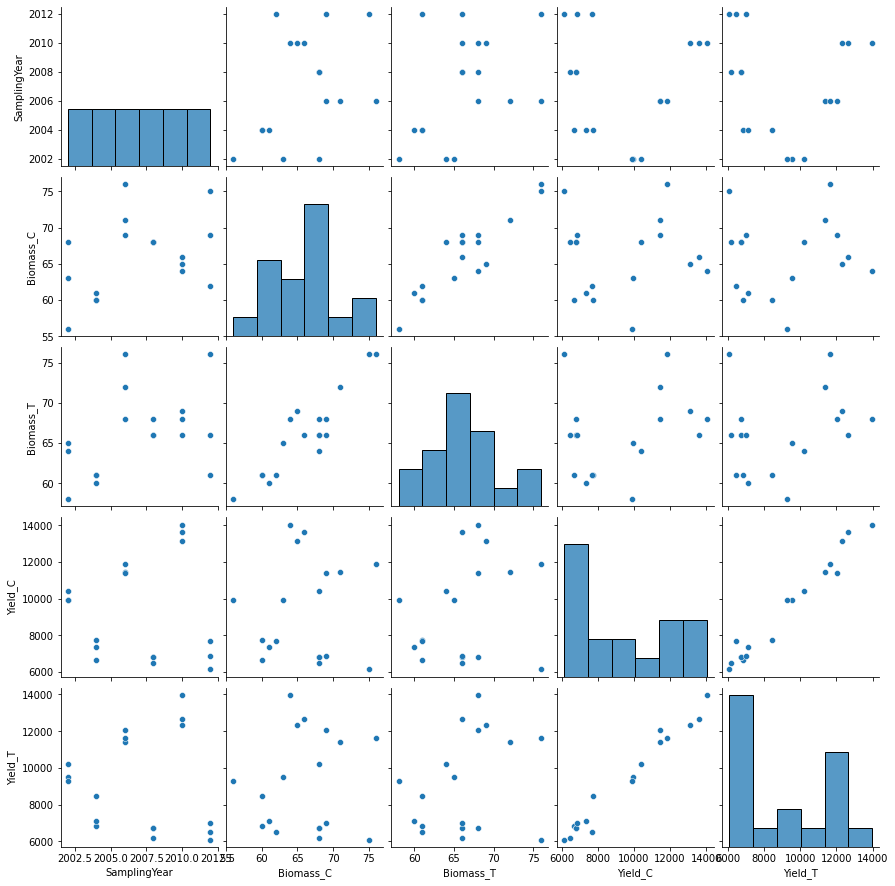

In [37]:
sns.pairplot(corn)

# Plotting Corn CC, RT, and NT

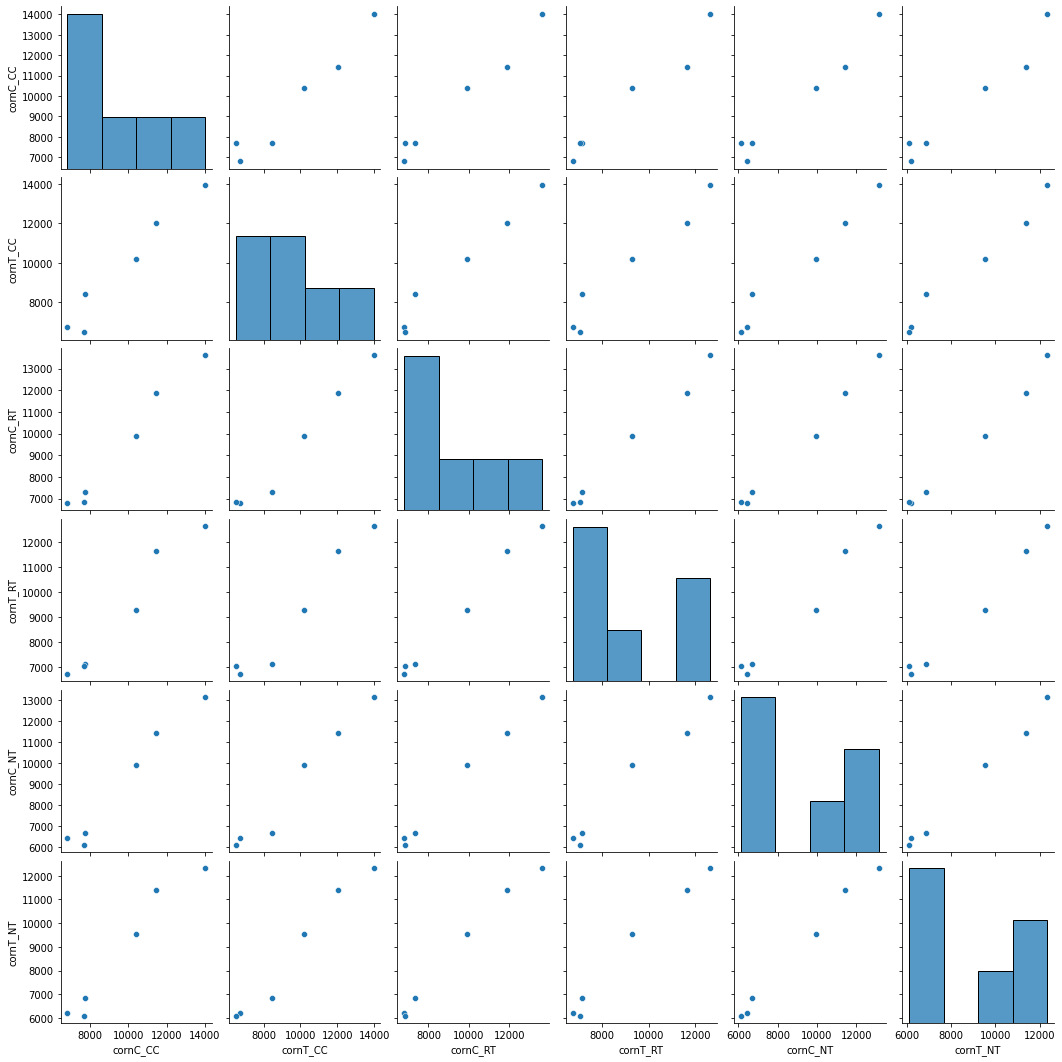

In [38]:
sns.pairplot(corn_yield)

In [ ]:
# We definitely see a positive correlation but I was not satisfied and to me this did not show much. 
# So I proceeded with other plotting

In [40]:
SoyCornYield = pd.concat([soy_yield, corn_yield], axis=1)

SoyCornYield

,soyC_CC,soyT_CC,soyC_RT,soyT_RT,soyC_NT,soyT_NT,cornC_CC,cornT_CC,cornC_RT,cornT_RT,cornC_NT,cornT_NT
SamplingYear,,,,,,,,,,,,
2002,1980.0,1980.0,2070.0,1780.0,2370.0,2240.0,10400.0,10200.0,9900.0,9300.0,9930.0,9530.0
2006,3100.0,3300.0,3370.0,2840.0,3170.0,2900.0,11420.0,12040.0,11860.0,11630.0,11440.0,11400.0
2008,3040.0,3040.0,2840.0,2900.0,2840.0,3100.0,6800.0,6730.0,6800.0,6730.0,6460.0,6200.0
2010,2880.0,2750.0,2790.0,2530.0,2940.0,2860.0,14030.0,13970.0,13610.0,12640.0,13130.0,12330.0
2012,1820.0,1710.0,1960.0,2160.0,2650.0,2870.0,7680.0,6490.0,6850.0,7030.0,6130.0,6100.0
2004,NaN,NaN,NaN,NaN,NaN,NaN,7720.0,8450.0,7330.0,7130.0,6670.0,6860.0


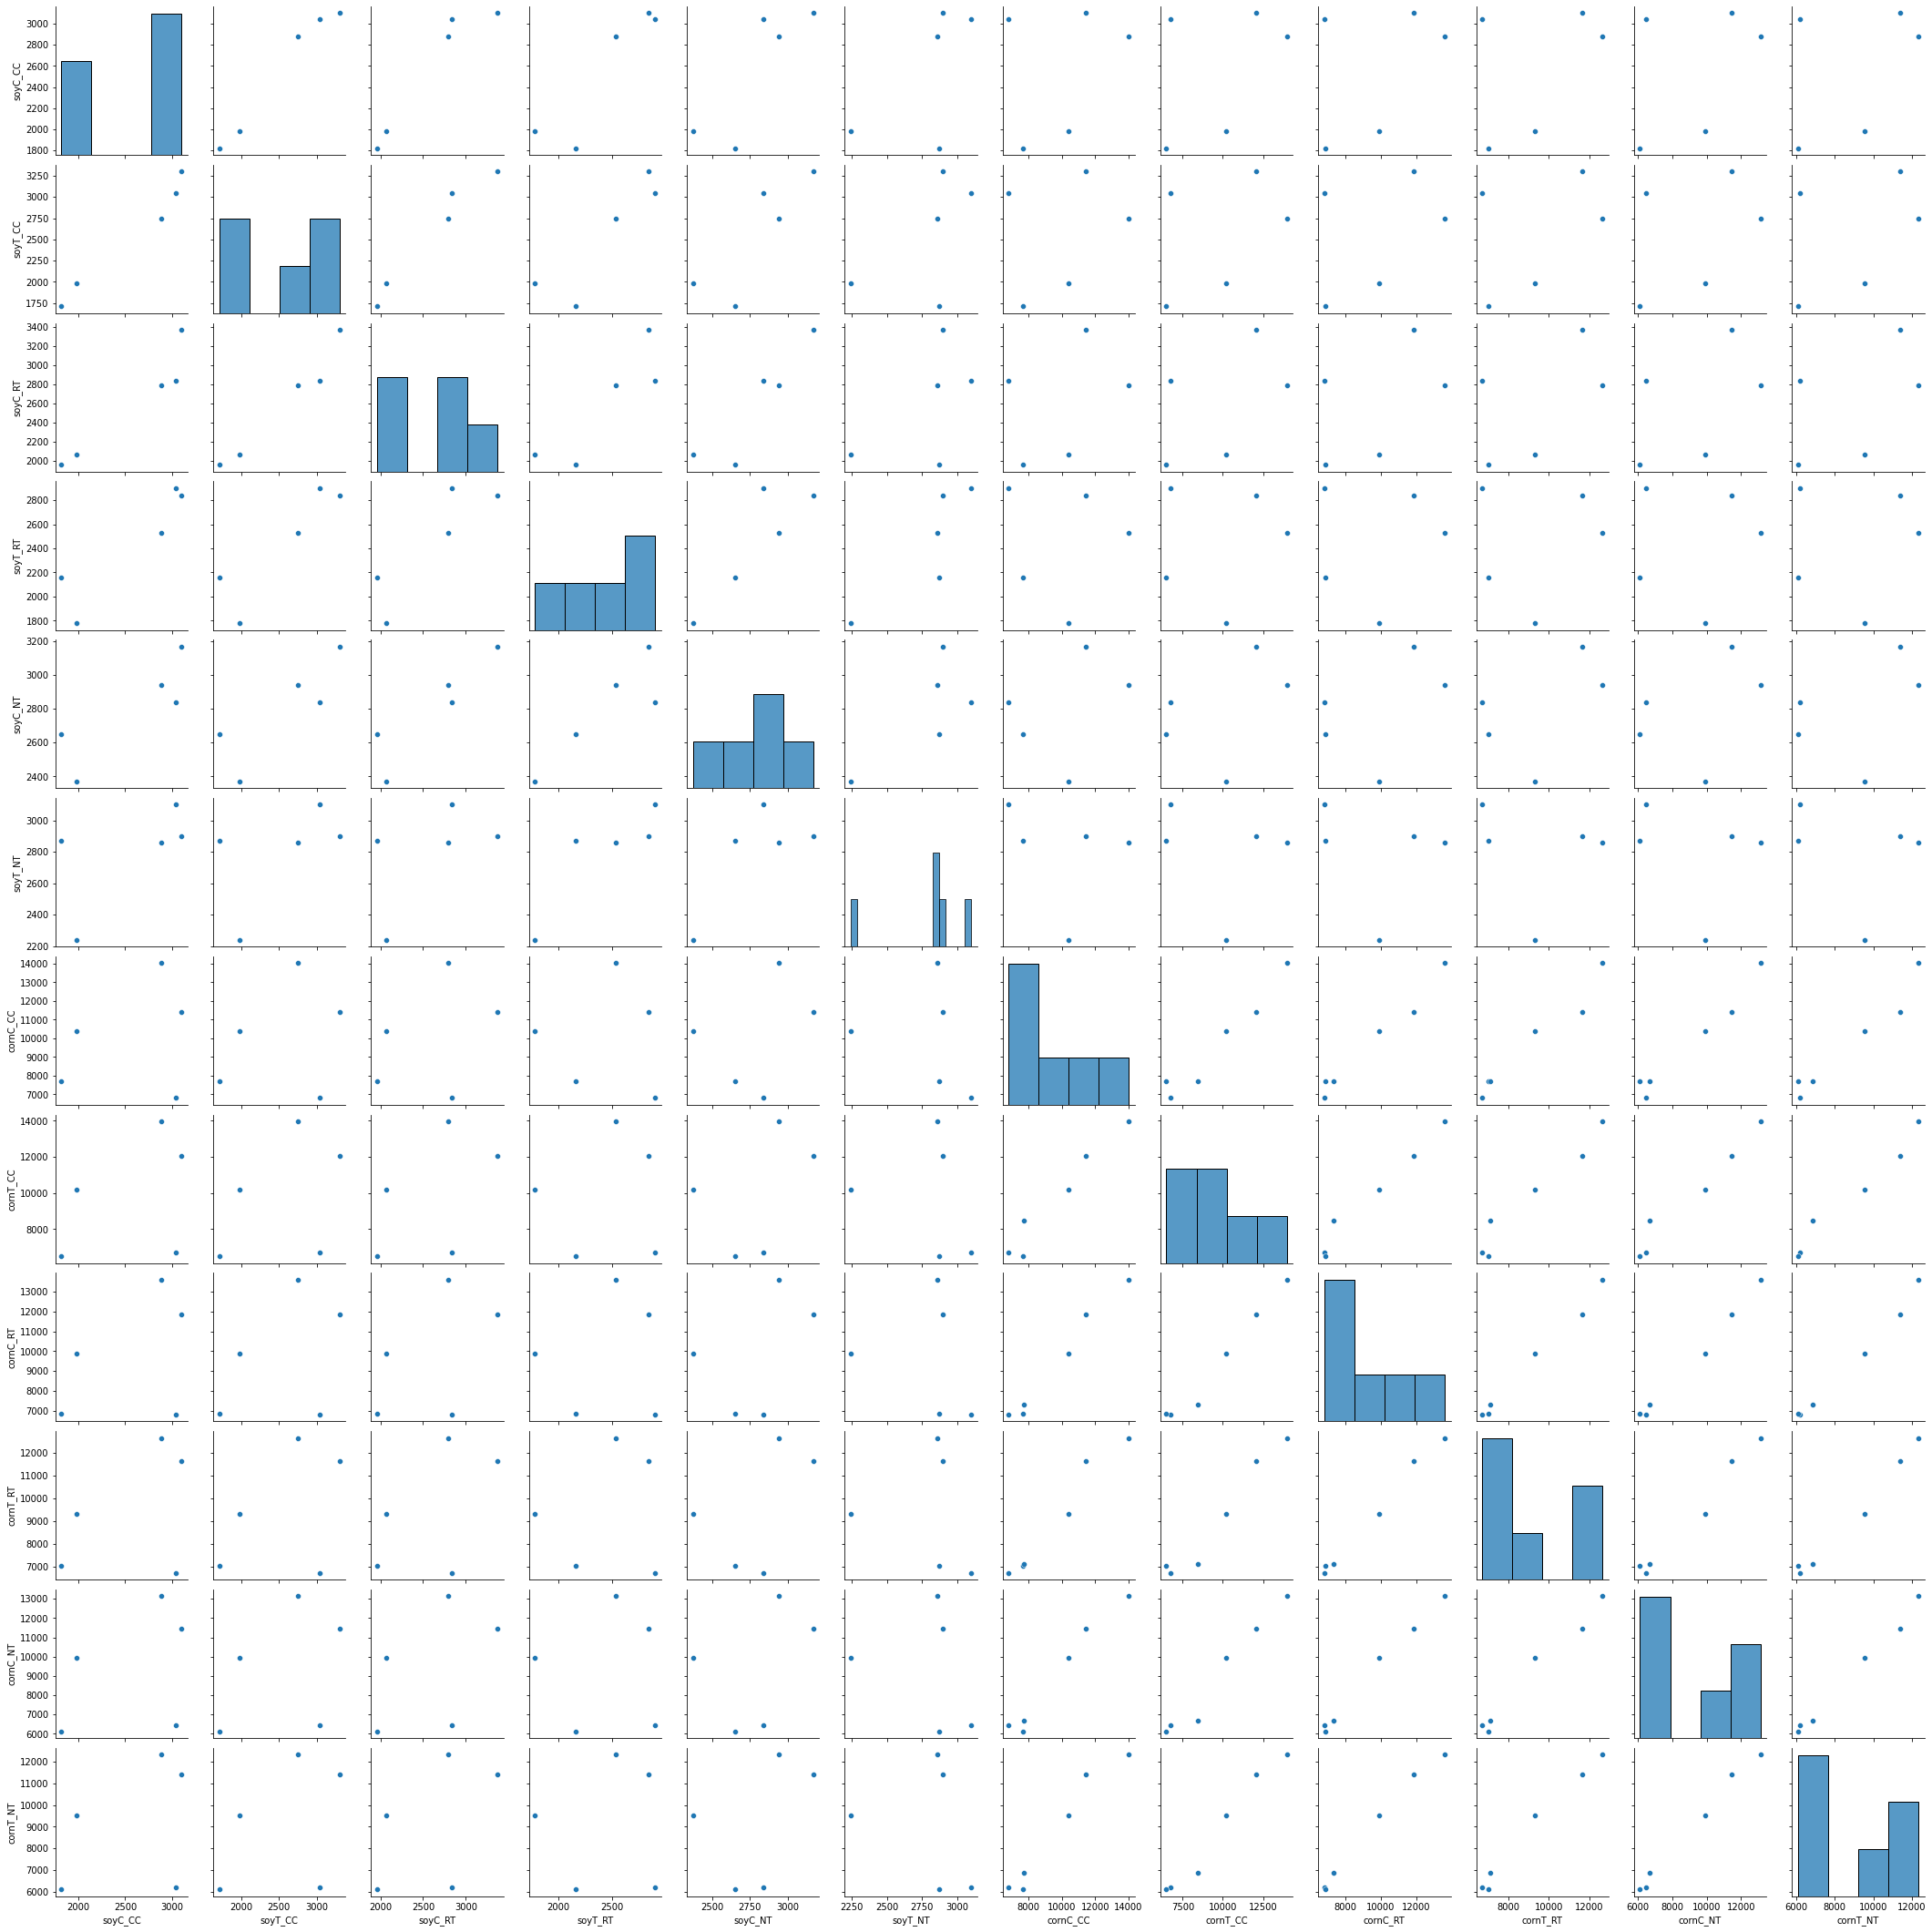

In [41]:
sns.pairplot(SoyCornYield)

In [ ]:
# Plot was way too busy

## Histogram

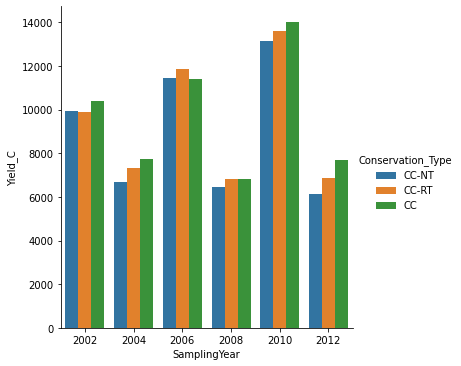

In [42]:
sns.catplot(x="SamplingYear", y="Yield_C", hue="Conservation_Type", kind="bar", data=corn)

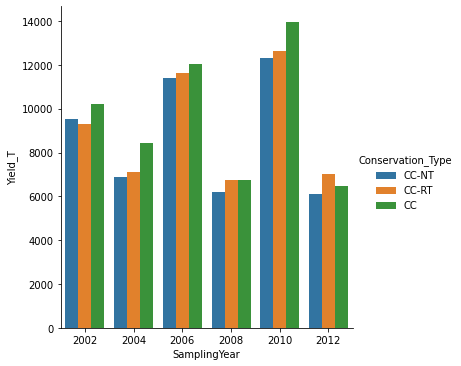

In [43]:
sns.catplot(x="SamplingYear", y="Yield_T", hue="Conservation_Type", kind="bar", data=corn)

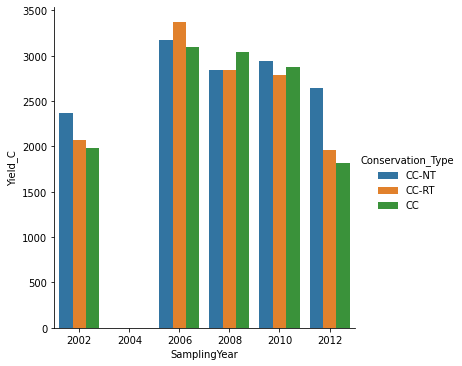

In [44]:
sns.catplot(x="SamplingYear", y="Yield_C", hue="Conservation_Type", kind="bar", data=soy)

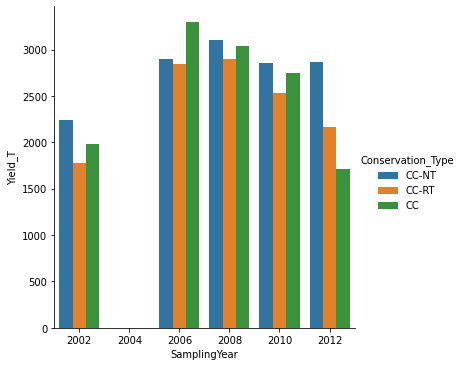

In [45]:
sns.catplot(x="SamplingYear", y="Yield_T", hue="Conservation_Type", kind="bar", data=soy)

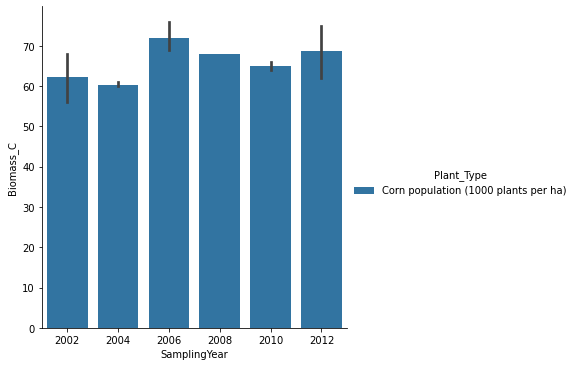

In [49]:
sns.catplot(x="SamplingYear", y="Biomass_C", hue="Plant_Type", kind="bar", data=corn)

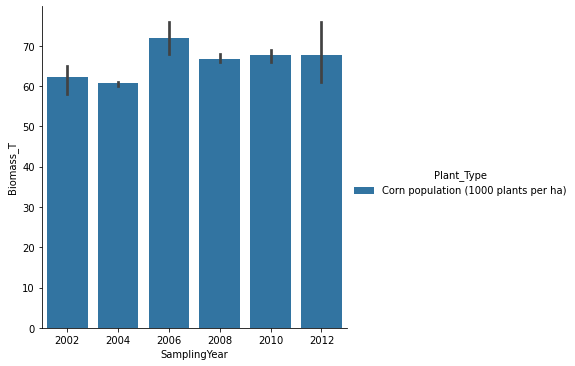

In [47]:
sns.catplot(x="SamplingYear", y="Biomass_T", hue="Plant_Type", kind="bar", data=corn)

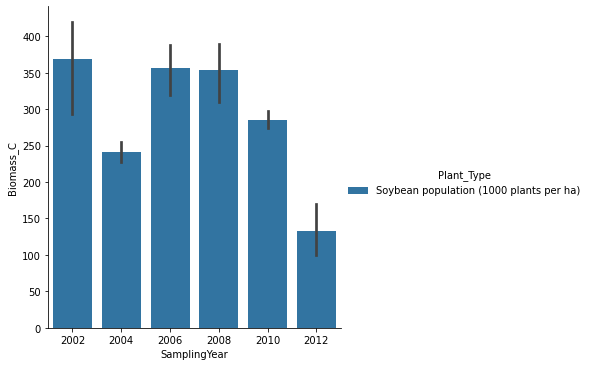

In [52]:
sns.catplot(x="SamplingYear", y="Biomass_C", hue="Plant_Type", kind="bar", data=soy)

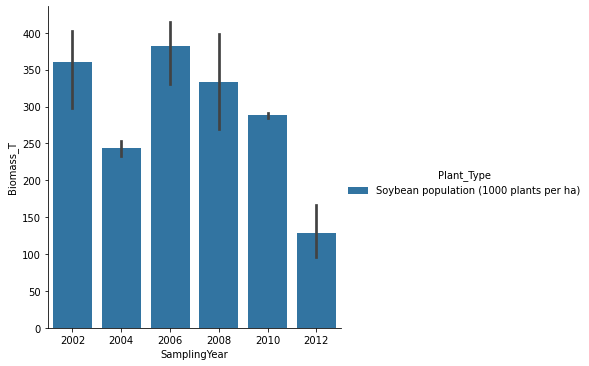

In [53]:
sns.catplot(x="SamplingYear", y="Biomass_T", hue="Plant_Type", kind="bar", data=soy)

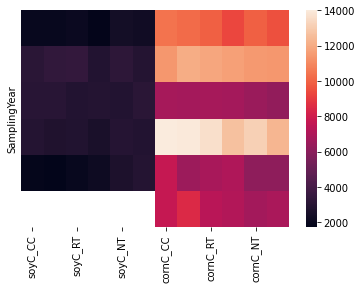

In [54]:
ax = sns.heatmap(SoyCornYield, xticklabels=2, yticklabels=False)

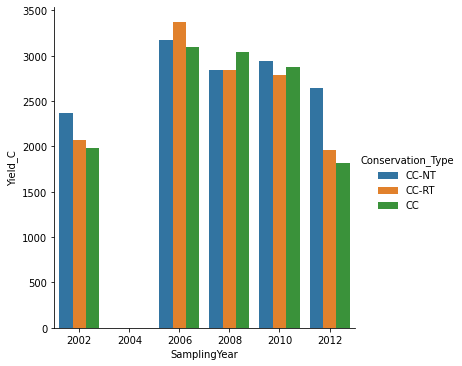

In [55]:
sns.catplot(x="SamplingYear", y="Yield_C", hue="Conservation_Type", kind="bar", data=soy)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


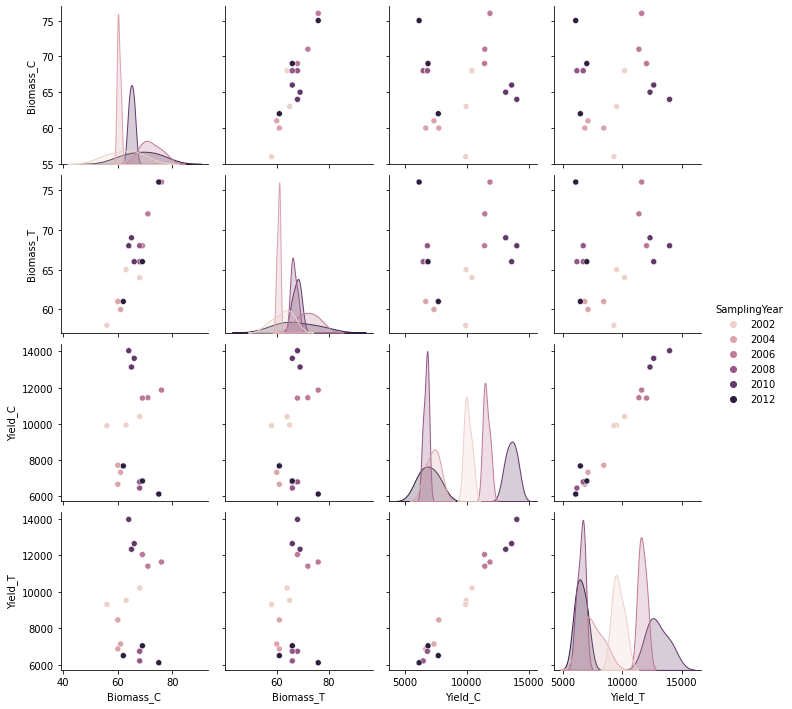

In [56]:
sns.pairplot(corn, hue = "SamplingYear")

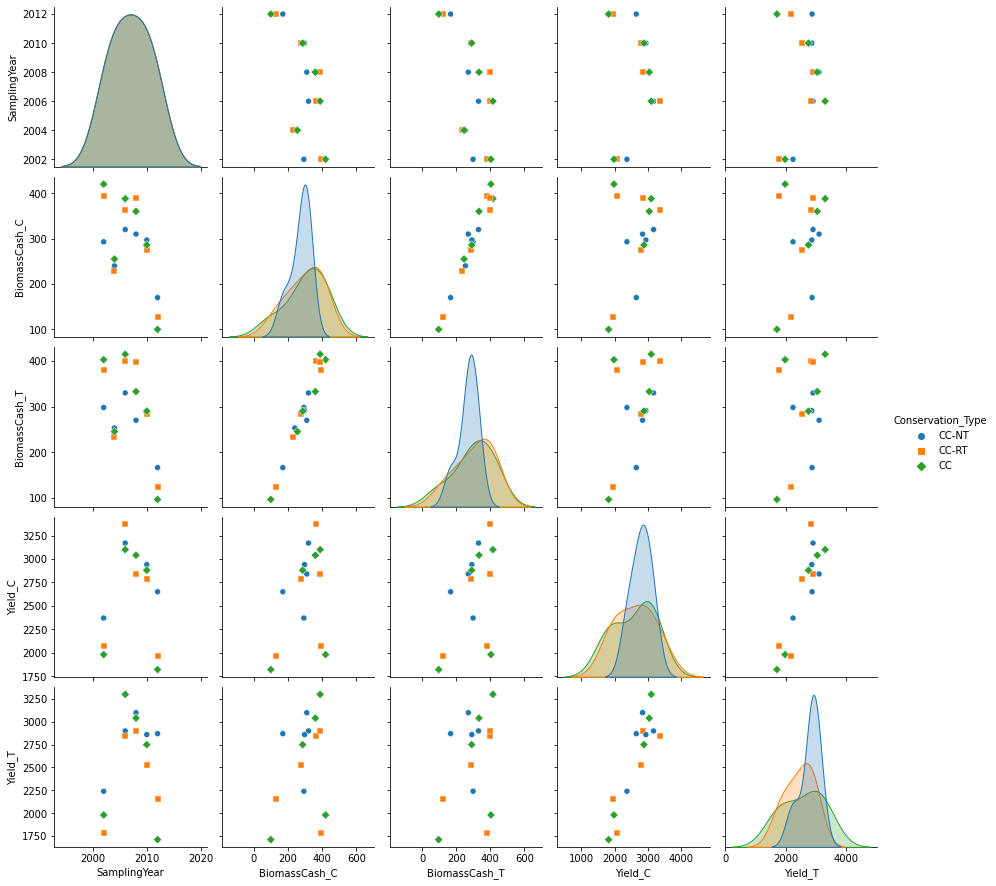

In [66]:
sns.pairplot(soy, hue = "Conservation_Type", markers = ["o", "s", "D"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


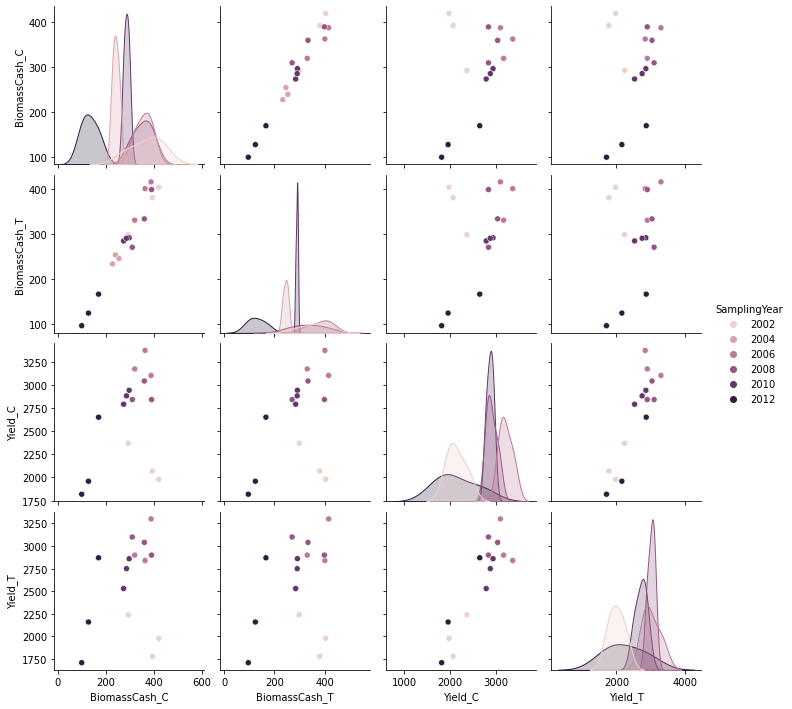

In [99]:
sns.pairplot(soy, hue = "SamplingYear")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


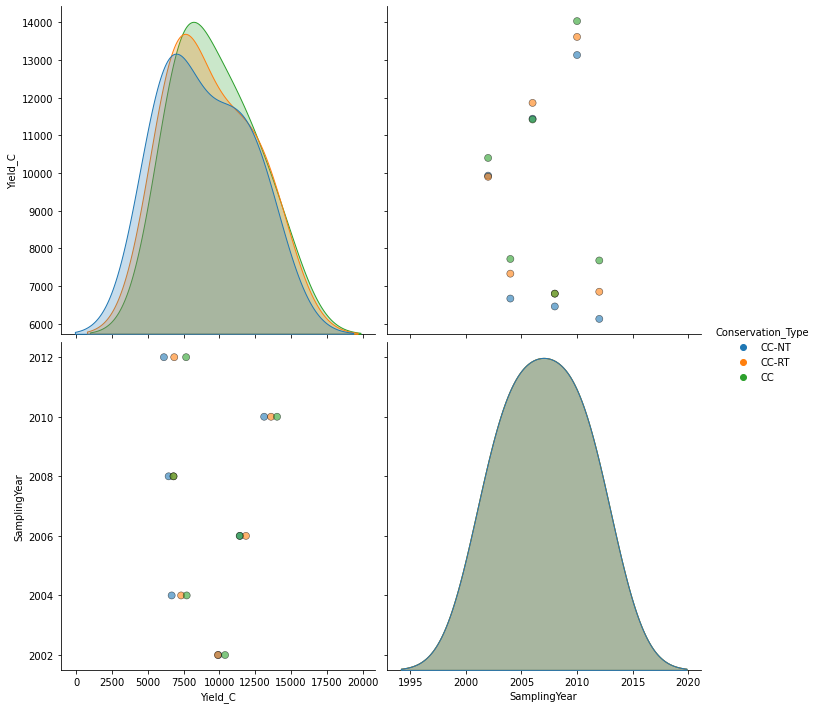

In [103]:
sns.pairplot(corn, 
             vars = ['Yield_C', 'SamplingYear',], 
             hue = 'Conservation_Type', diag_kind = 'kde',
             plot_kws = {'alpha': .6, 's': 50, 'edgecolor': 'black'},
             size = 5);

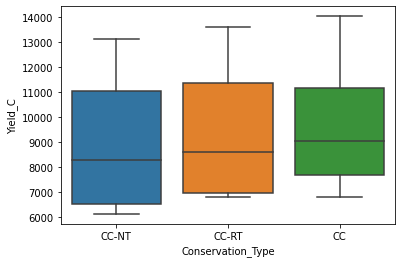

In [48]:
sns.boxplot(x=corn['Conservation_Type'], y=corn['Yield_C']);

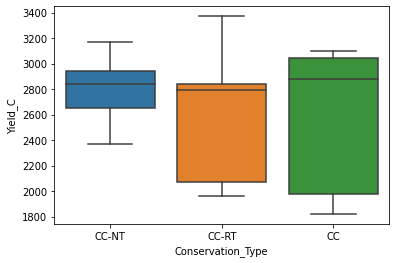

In [58]:
sns.boxplot(x=soy['Conservation_Type'], y=soy['Yield_C']);

In [1]:
sns.catplot(x="SamplingYear", y="Yield_C", hue="Plant_Type", kind="bar", data=corn)

NameError: name 'sns' is not defined

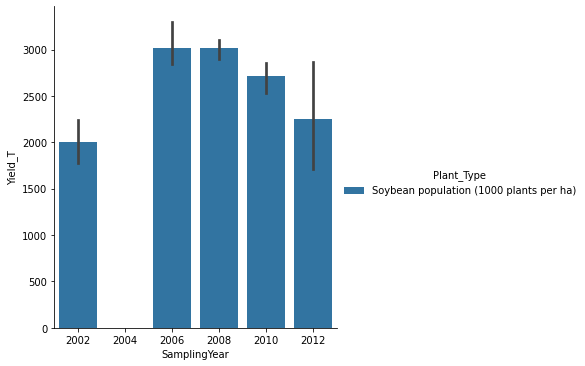

In [60]:
sns.catplot(x="SamplingYear", y="Yield_T", hue="Plant_Type", kind="bar", data=soy)

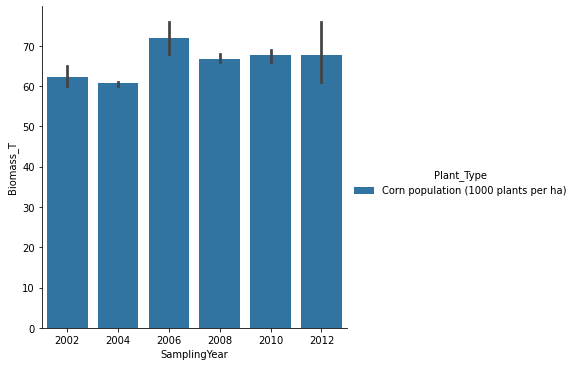

In [61]:
sns.catplot(x="SamplingYear", y="Biomass_T", hue="Plant_Type", kind="bar", data=corn)

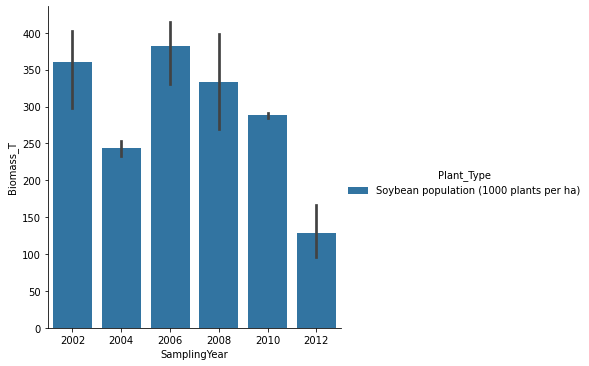

In [62]:
sns.catplot(x="SamplingYear", y="Biomass_T", hue="Plant_Type", kind="bar", data=soy)

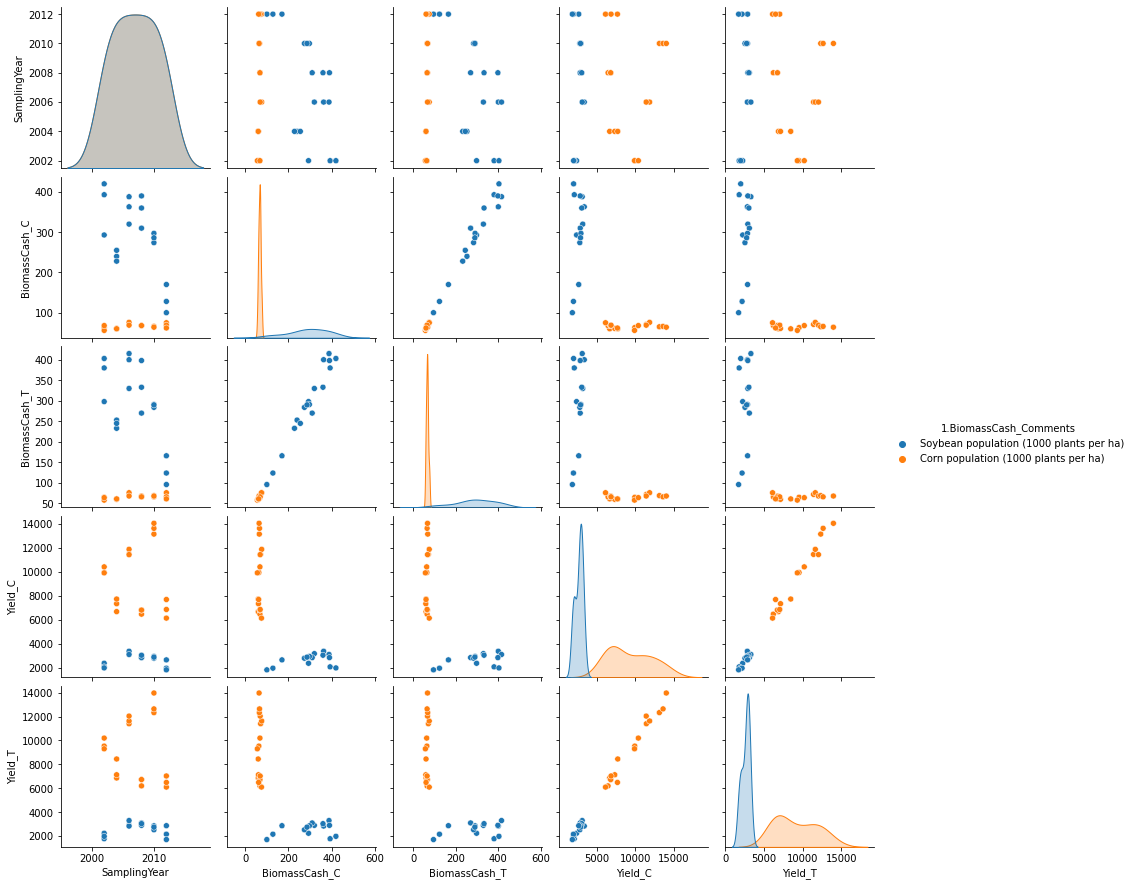

In [92]:
sns.pairplot(soybean, hue = "1.BiomassCash_Comments")

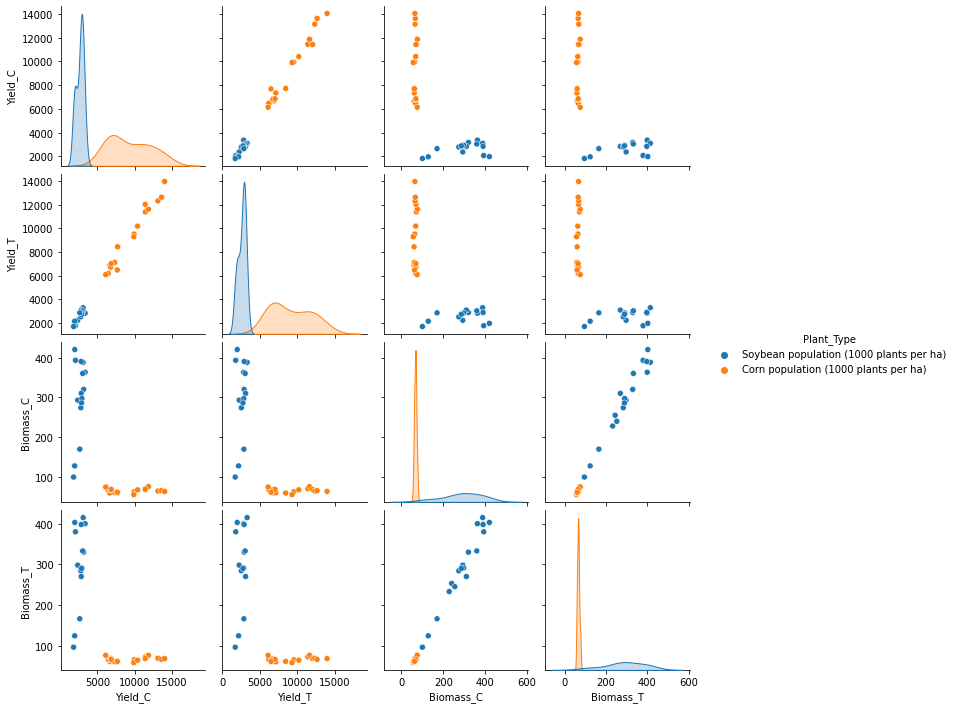

In [64]:
sns.pairplot(soybean, vars = ['Yield_C', 'Yield_T', 'Biomass_C', 'Biomass_T'], hue= 'Plant_Type')